<a href="https://colab.research.google.com/github/DCBassi/Tech_Challenge_1/blob/narciso/01-exploracao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importação das bibliotecas:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
# Opção 2
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

Carregar os dados da análise:

In [2]:
# Carregar o dataset
df = pd.read_csv('diabetes.csv')

# Visualizar as primeiras linhas
print(df.head())

# Verificar informações básicas do dataset
print(df.info())

# Estatísticas descritivas
print(df.describe())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

Analisando a distribuição das variáveis através de um histograma:

In [3]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


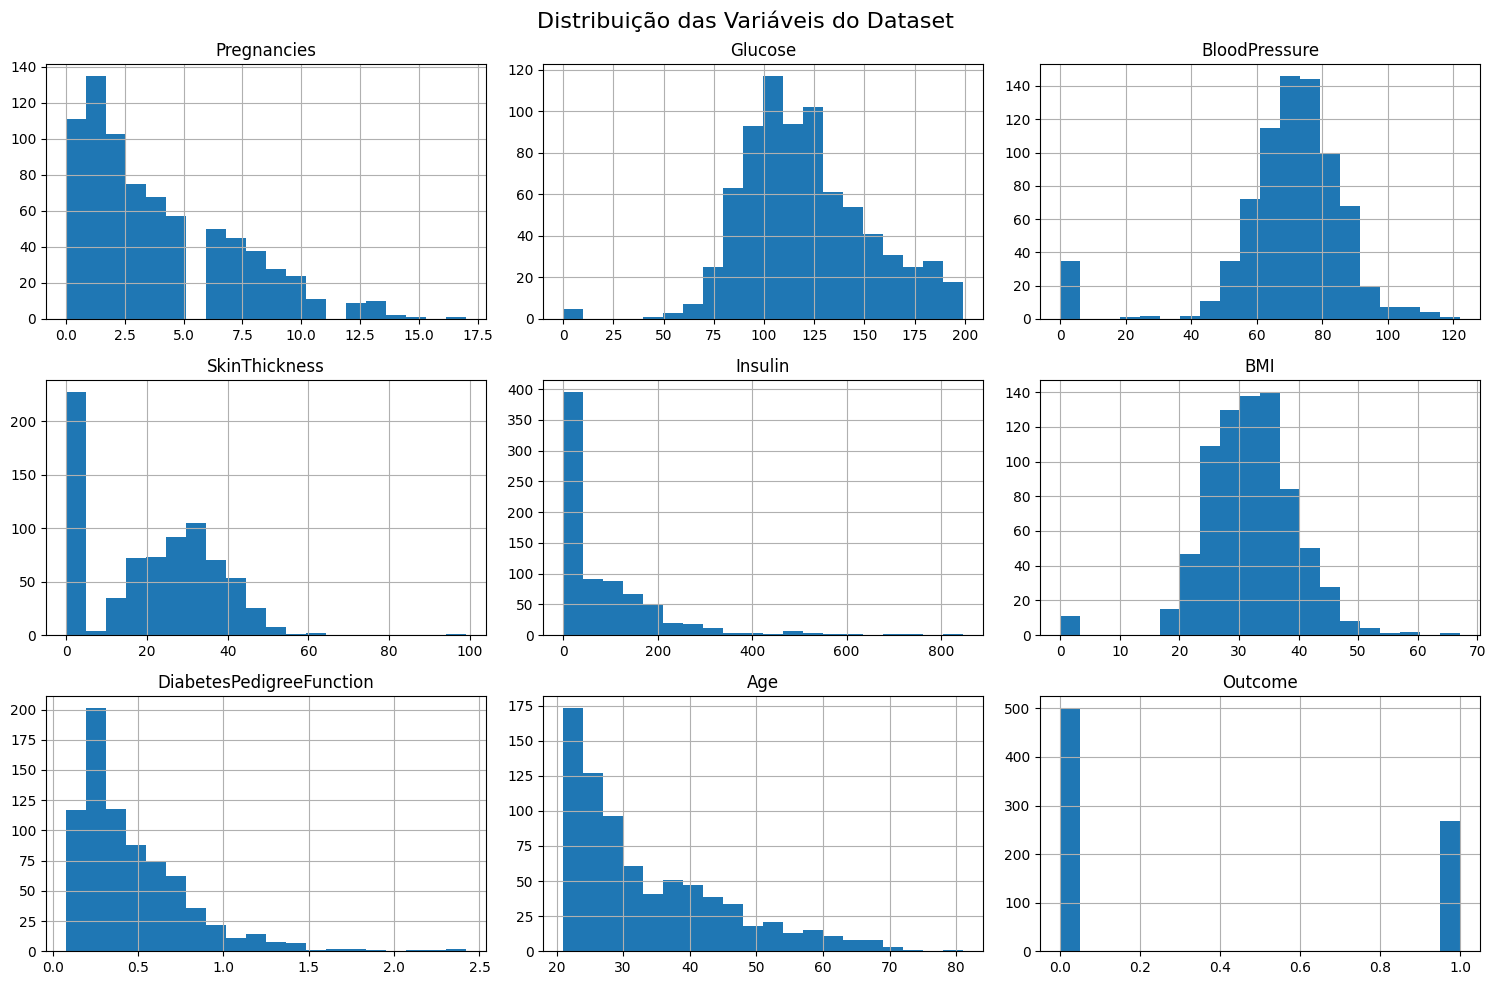

In [4]:
# Criar histogramas para ver a distribuição das variáveis
df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribuição das Variáveis do Dataset', fontsize=16)
plt.tight_layout()
plt.show()

Analisando a correlação das variáveis:

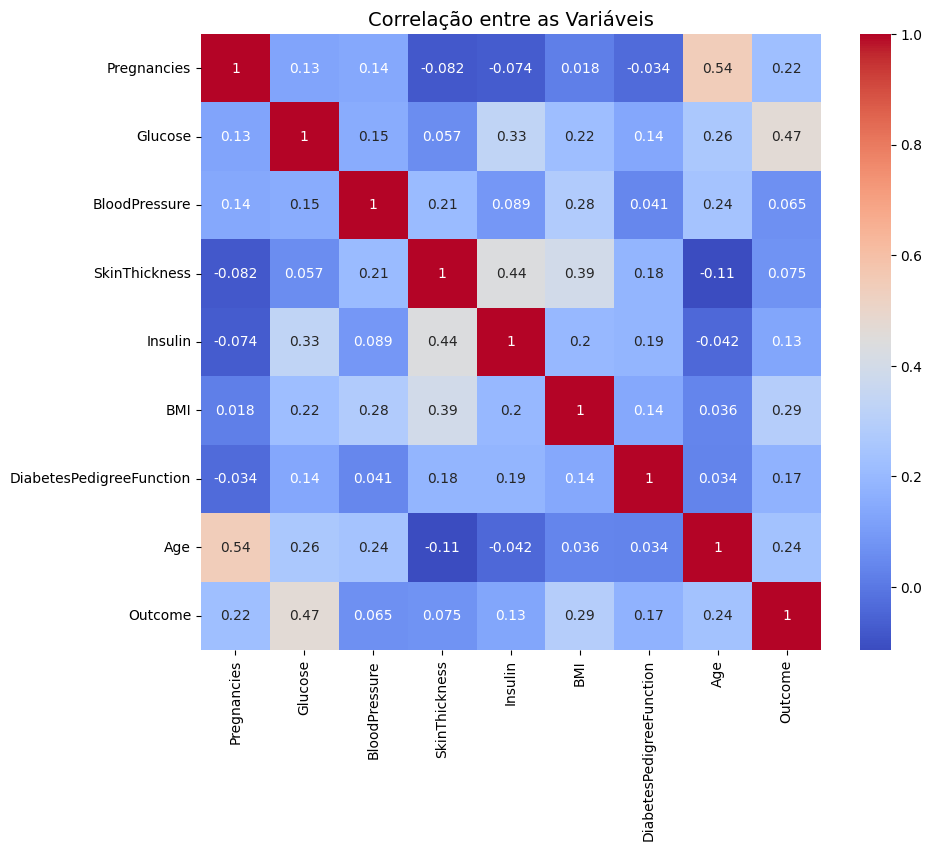

In [5]:
# Criar mapa de calor da correlação
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre as Variáveis', fontsize=14)
plt.show()

Fazendo a tratativa dos zeros:

In [6]:
# Verificando a quantidade de zeros nas colunas suspeitas
colunas_problema = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for coluna in colunas_problema:
    print(f'{coluna} - quantidade de zeros: {df[coluna].value_counts().get(0, 0)}')

# Substituindo zeros pela mediana
for coluna in colunas_problema:
    df[coluna] = df[coluna].replace(0, None)

Glucose - quantidade de zeros: 5
BloodPressure - quantidade de zeros: 35
SkinThickness - quantidade de zeros: 227
Insulin - quantidade de zeros: 374
BMI - quantidade de zeros: 11


Separando variável target e entrada:

In [7]:
# Separando as variáveis de entrada e o alvo
X = df.drop('Outcome', axis=1)
Y = df['Outcome']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,stratify=Y, random_state=42)

Escalonando os dados:

In [8]:
# Normalizando os dados
scaler = MinMaxScaler()
X_treino_normalizado = scaler.fit_transform(X_train)
X_teste_normalizado = scaler.transform(X_test)

In [9]:
X_treino_escala = pd.DataFrame(X_treino_normalizado,columns=X_train.columns,index=X_train.index)
X_teste_escala = pd.DataFrame(X_teste_normalizado,columns=X_test.columns,index=X_test.index)

Aplicação do Imputer:

In [10]:
imputer = SimpleImputer(strategy="median")
X_treino_imputer = imputer.fit_transform(X_treino_escala)
X_teste_imputer = imputer.transform(X_teste_escala)
X_treino_completo = pd.DataFrame(X_treino_imputer,columns=X_treino_escala.columns,index=X_treino_escala.index)
X_teste_completo = pd.DataFrame(X_teste_imputer,columns=X_teste_escala.columns,index=X_teste_escala.index)

In [11]:
X_treino_completo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 353 to 107
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               614 non-null    float64
 1   Glucose                   614 non-null    float64
 2   BloodPressure             614 non-null    float64
 3   SkinThickness             614 non-null    float64
 4   Insulin                   614 non-null    float64
 5   BMI                       614 non-null    float64
 6   DiabetesPedigreeFunction  614 non-null    float64
 7   Age                       614 non-null    float64
dtypes: float64(8)
memory usage: 43.2 KB


Testando:

In [12]:
ros = RandomUnderSampler(random_state=42)
X_treino_final, Y_treino_final = ros.fit_resample(X_treino_completo,Y_train)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_treino_final, Y_treino_final)
y_pred = model.predict(X_teste_completo)
accuracy = accuracy_score(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)


# Métricas
print(f"Acurácia: {accuracy_score(Y_test, y_pred):.2f}")
print(f"Precisão: {precision_score(Y_test, y_pred):.2f}")
print(f"Recall: {recall_score(Y_test, y_pred):.2f}")
print(f"F1-score: {f1_score(Y_test, y_pred):.2f}")
print("\nMatriz de Confusão:\n", confusion_matrix(Y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(Y_test, y_pred))

Acurácia: 0.71
Precisão: 0.57
Recall: 0.72
F1-score: 0.63

Matriz de Confusão:
 [[70 30]
 [15 39]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.82      0.70      0.76       100
           1       0.57      0.72      0.63        54

    accuracy                           0.71       154
   macro avg       0.69      0.71      0.70       154
weighted avg       0.73      0.71      0.71       154



In [15]:
background_data = shap.utils.sample(X_treino_completo, 100)

explainer = shap.KernelExplainer(model.predict, background_data)

shap_values = explainer.shap_values(X_teste_completo)
print(f"Valores SHAP calculados para {len(X_teste_completo)} instâncias.")
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_teste_completo.iloc[0,:])

  0%|          | 0/154 [00:00<?, ?it/s]

Valores SHAP calculados para 154 instâncias.
